# Outlier Detection

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style="whitegrid")
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
# Training set
X_train = pd.read_csv(".\data\csv_data\TRAINING_SET_DM2_151var.csv")
y_train = pd.read_csv(".\data\csv_data\y_train.csv")

In [3]:
X_train.shape

(7352, 151)

In [4]:
y_train.shape

(7352, 1)

In [5]:
#standardization
scl = StandardScaler()
x_train_stdr = scl.fit_transform(X_train)

In [6]:
# TRAIN DATASET PER FARE I GRAFICI DOPO

# subjects
subject_train = pd.read_csv(r".\data\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt", header=None)

# mapping labels to y_test
y_train_labels = y_train.Label.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe train
train = pd.read_csv('.\data\csv_data\X_train.csv')
X_train_for_viz = train.copy()
train['Subject'] = subject_train[0]
train['Label'] = pd.read_csv(".\data\csv_data\y_train.csv")
train['Activity'] = y_train_labels

In [7]:
X_train_for_viz.shape

(7352, 561)

In [8]:
# 2 PC (DA X_train) SU CUI VISUALIZZARE I RISULTATI
from sklearn.decomposition import PCA
X_scaled = scl.fit_transform(X_train_for_viz.values)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

## LOF (Local Outlier Factor)


LOF is a density-based approach. 

The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.


class sklearn.neighbors.LocalOutlierFactor(n_neighbors=20, *, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination='auto', novelty=False, n_jobs=None)

n_neighbors è il parametro da scegliere. (might be difficult; default=20)

In [9]:
from sklearn.neighbors import LocalOutlierFactor

In [10]:
# LOF 
clf = LocalOutlierFactor(n_neighbors = 50)
outliers = clf.fit_predict(x_train_stdr)

In [11]:
outliers_LOF = X_train.loc[np.where(outliers == -1)]

In [13]:
outliers_LOF

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",...,fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.994612,-0.407747,-0.602122,0.929294,0.359910,-0.058526,...,-1.000000,0.586156,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446
67,-0.239103,-0.096904,0.148035,-0.637325,-0.654190,-0.295052,0.576139,-0.466783,-0.211029,0.137502,...,-0.897436,-0.343494,-0.855510,-1.000000,-0.691219,-0.157009,0.002418,-0.002366,-0.101878,0.543207
69,0.303833,0.103648,-0.245331,-0.755994,-0.927681,0.503503,-0.632568,-0.278010,-0.546169,0.249501,...,-1.000000,-0.037418,-0.883307,-1.000000,-0.281684,-0.268042,-0.116769,-0.391404,0.413596,0.051020
70,-0.361205,-0.268121,0.176896,-0.599392,-0.428087,-0.465699,0.389721,-0.254435,-0.184038,-0.034751,...,-1.000000,-0.324512,-0.844663,-1.000000,-0.525170,0.063364,0.152830,0.149602,0.127245,0.192852
71,-0.277066,-0.684097,0.346658,-0.596410,-0.376917,-0.393086,0.913389,-0.268960,-0.066561,-0.127284,...,-0.948718,-0.399053,-0.676841,-1.000000,-0.533867,0.018979,0.123108,0.432540,-0.083446,0.025648
72,0.257476,-0.413865,0.017374,-0.919666,-0.912202,-0.006706,0.185223,-0.396415,-0.125534,-0.021215,...,-0.948718,-0.162395,-0.946256,-1.000000,-0.269565,0.285085,-0.000793,0.267189,-0.186202,0.098099
237,-0.066239,0.079229,-1.000000,-0.683779,0.548666,-0.127820,-0.879851,-0.276241,-0.054758,0.040127,...,-0.948718,-0.407762,-0.862553,-0.968254,-0.201042,-0.016177,0.050623,0.283832,-0.483059,-0.371683
238,-0.083287,0.010298,-0.516084,-0.738200,-0.254910,-0.383857,-0.270453,0.176254,-0.224203,0.405419,...,-0.897436,-0.561817,-0.931322,-0.968254,-0.102071,-0.453807,-0.078849,0.139326,-0.173446,0.444032
1062,-0.367240,0.087724,-0.327635,-0.323467,-0.872841,0.055355,-0.710208,-0.250969,0.130178,0.210626,...,-1.000000,-0.194049,-0.929127,-1.000000,-0.308757,-0.334215,-0.097297,0.241330,-0.238340,0.543845
1209,-0.853848,0.205365,-0.116345,-0.057142,-0.782524,0.004115,-0.043627,-0.635754,-0.082227,-0.165599,...,-0.743590,-0.690232,-0.992939,-1.000000,0.312514,-0.283143,-0.112471,0.125196,-0.097307,0.420805


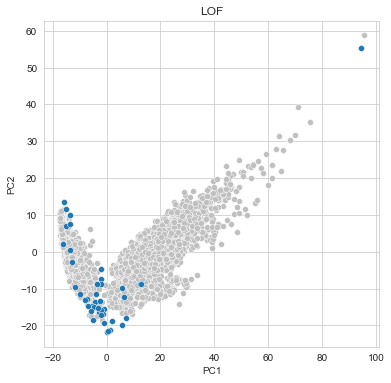

In [67]:
# 2D LOF plot su PCA
x=X_pca[:,0]
y=X_pca[:,1]

plt.figure(figsize=(6,6))

sns.scatterplot(x=x, y=y, color = 'silver')
sns.scatterplot(x=x[outliers_LOF.index],y=y[outliers_LOF.index], color = 'tab:blue')
plt.title('LOF')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()
# marker='X'

## ABOD (Angle-Based Outlier Degree)


ABOD is a high-dimensional approach for outlier detection. Quindi si può tranquillamente utilizzare sul dataset originale (X_train). Solitamente overestima gli outliers.
Two version of ABOD are supported:
- Fast ABOD: use k nearest neighbors to approximate.
- Original ABOD: consider all training points with high time complexity at O(n^3).


class pyod.models.abod.ABOD(contamination=0.1, n_neighbors=5, method='fast')

In [32]:
from pyod.models.abod import ABOD

In [33]:
# ABOD 
clf = ABOD(n_neighbors = 20)
clf.fit(x_train_stdr)

outliers4 = clf.predict(x_train_stdr)

# Outliers
outlier_adob = X_train.loc[np.where(outliers4==1)]
outlier_adob

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",...,fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.994612,-0.407747,-0.602122,0.929294,0.359910,-0.058526,...,-1.000000,0.586156,-0.991048,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446
32,0.013904,0.153296,0.016243,-0.808638,-0.911172,-0.366055,0.261060,-0.185873,0.017570,-0.359704,...,-1.000000,0.017846,-0.982268,-1.000000,0.181287,0.143358,-0.004913,0.033988,-0.036068,0.205113
51,0.403474,-0.015074,-0.118167,-0.914811,-0.993204,0.583722,-0.268790,-0.363920,-0.251314,0.043181,...,-1.000000,0.307262,-0.986414,-1.000000,-0.274891,0.383907,-0.068580,-0.043105,-0.332249,0.487505
64,0.019016,-0.007037,-0.028333,-0.661294,-0.947495,0.030496,0.095981,-0.036349,0.060712,0.027188,...,-0.948718,-0.164121,-0.982119,-1.000000,-0.118641,0.396355,0.033488,0.061568,-0.514438,0.240943
67,-0.239103,-0.096904,0.148035,-0.637325,-0.654190,-0.295052,0.576139,-0.466783,-0.211029,0.137502,...,-0.897436,-0.343494,-0.855510,-1.000000,-0.691219,-0.157009,0.002418,-0.002366,-0.101878,0.543207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,-0.025283,-0.004595,-0.111205,-0.050591,-0.698345,-0.143017,0.221436,-0.267332,-0.018000,0.060033,...,-0.897436,-0.448528,-0.810817,-0.904762,0.040549,-0.443825,0.980889,-0.298120,0.741478,0.251649
7319,0.490892,0.015341,-0.034447,0.137478,-0.697054,0.266937,0.390798,-0.258173,-0.441760,0.695807,...,-0.743590,-0.603017,-0.809598,-0.968254,-0.056856,-0.319768,-0.617576,0.560657,-0.906210,-0.346317
7320,0.444521,-0.031033,-0.041120,0.073705,-0.597079,0.210131,0.443663,-0.183309,-0.435035,0.718979,...,-0.794872,-0.501938,-0.973268,-0.936508,-0.094800,-0.057451,-0.692695,-0.711148,-0.877483,-0.669912
7321,0.324216,-0.044241,-0.184564,0.129899,-0.661230,0.153935,0.108986,-0.206200,-0.052933,0.284740,...,-1.000000,-0.377504,-0.876112,-0.904762,-0.114324,-0.209017,-0.155177,-0.563769,-0.944006,-0.701732


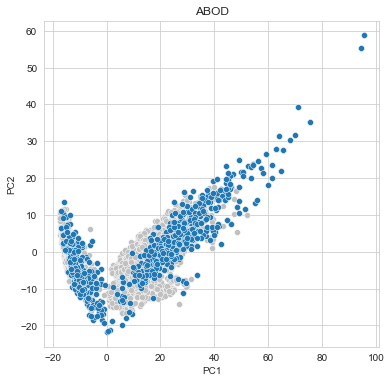

In [68]:
# 2D LOF plot su PCA
x=X_pca[:,0]
y=X_pca[:,1]

plt.figure(figsize=(6,6))

sns.scatterplot(x=x, y=y, color = 'silver')
sns.scatterplot(x=x[outlier_adob.index],y=y[outlier_adob.index], color = 'tab:blue')
plt.title('ABOD')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

## ISOLATION FOREST

Isolation Forest è un model-based approach.
The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.
Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.
This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

class sklearn.ensemble.IsolationForest(*, n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [37]:
from sklearn.ensemble import IsolationForest

In [38]:
# IsolationForest con default options
clf = IsolationForest(random_state=0)
clf.fit(X_train)

outliers = clf.predict(X_train)

outlier_isolationForest = X_train.loc[np.where(outliers==-1)]
outlier_isolationForest

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",...,fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)"
27,0.144504,0.189263,0.062769,-0.904300,-0.814286,-0.484722,0.173808,-0.041078,0.073865,-0.318717,...,-1.000000,-0.533023,-0.995764,-1.000000,-0.257607,0.156185,0.013526,0.043354,0.021485,0.046689
32,0.013904,0.153296,0.016243,-0.808638,-0.911172,-0.366055,0.261060,-0.185873,0.017570,-0.359704,...,-1.000000,0.017846,-0.982268,-1.000000,0.181287,0.143358,-0.004913,0.033988,-0.036068,0.205113
64,0.019016,-0.007037,-0.028333,-0.661294,-0.947495,0.030496,0.095981,-0.036349,0.060712,0.027188,...,-0.948718,-0.164121,-0.982119,-1.000000,-0.118641,0.396355,0.033488,0.061568,-0.514438,0.240943
67,-0.239103,-0.096904,0.148035,-0.637325,-0.654190,-0.295052,0.576139,-0.466783,-0.211029,0.137502,...,-0.897436,-0.343494,-0.855510,-1.000000,-0.691219,-0.157009,0.002418,-0.002366,-0.101878,0.543207
69,0.303833,0.103648,-0.245331,-0.755994,-0.927681,0.503503,-0.632568,-0.278010,-0.546169,0.249501,...,-1.000000,-0.037418,-0.883307,-1.000000,-0.281684,-0.268042,-0.116769,-0.391404,0.413596,0.051020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6535,0.143105,0.020477,-0.181751,-0.792843,-0.912165,-0.162228,-0.157340,-0.435350,-0.038304,-0.223228,...,-1.000000,0.085605,-0.873849,-1.000000,-0.043409,0.517458,0.222368,-0.366016,-0.219877,0.050104
6671,0.334312,0.033722,-0.223703,-0.879079,-0.900680,0.016355,-0.214349,0.101986,0.015084,0.295158,...,-1.000000,0.521997,-0.979861,-1.000000,-0.270989,-0.249918,-0.042378,0.152583,0.520504,-0.398760
7000,-0.088994,0.270256,0.167615,-0.840510,-0.835195,-1.000000,0.635685,-0.620287,-0.519733,0.114104,...,-1.000000,0.014031,-0.946681,-0.968254,-0.108513,-0.391806,0.118589,0.094648,-0.021962,0.026312
7001,-0.003060,0.210302,0.036347,-0.797451,-0.876213,-0.239964,0.224477,-0.644911,-0.588654,0.326163,...,-0.948718,-0.018648,-0.996463,-1.000000,-0.507331,-0.130502,0.015838,0.063686,0.031717,0.007030


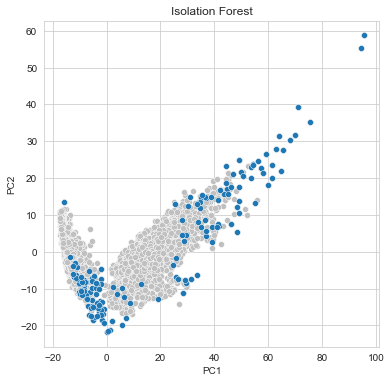

In [69]:
# 2D LOF plot su PCA
x=X_pca[:,0]
y=X_pca[:,1]

plt.figure(figsize=(6,6))

sns.scatterplot(x=x, y=y, color = 'silver')
sns.scatterplot(x=x[outlier_isolationForest.index],y=y[outlier_isolationForest.index], color = 'tab:blue')
plt.title('Isolation Forest')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

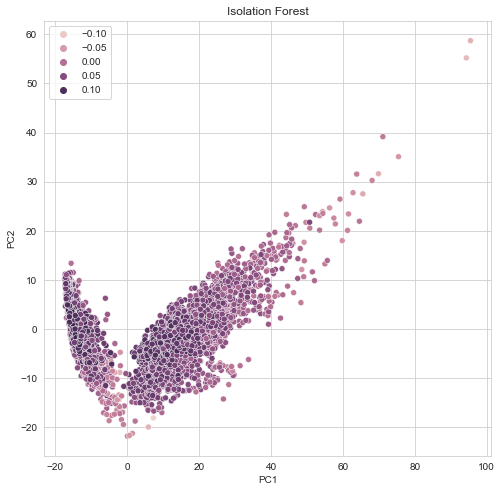

In [21]:
# 2D LOF plot su PCA
x=X_pca[:,0]
y=X_pca[:,1]

plt.figure(figsize=(8,8))

#sns.scatterplot(x=x, y=y, color = 'gray')
sns.scatterplot(x=x, y=y, hue=clf.decision_function(X_train))
#sns.scatterplot(x=x[outlier_isolationForest.index],y=y[outlier_isolationForest.index], color = 'red')
plt.title('Isolation Forest')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

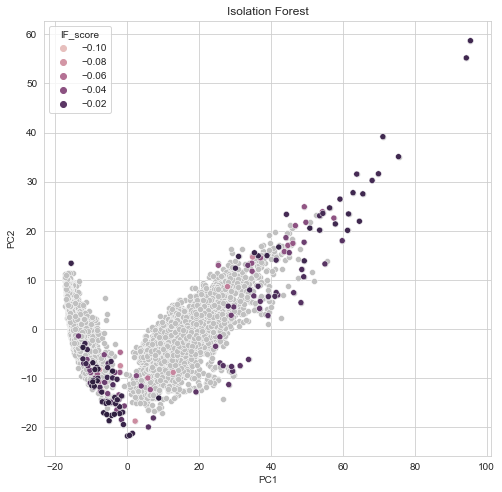

In [47]:
# 2D LOF plot su PCA
x=X_pca[:,0]
y=X_pca[:,1]
train['IF_score'] = clf.decision_function(X_train)
a = train.sort_values(['IF_score'], ascending=True)
top_outliers_IF = a.iloc[:166]

plt.figure(figsize=(8,8))

sns.scatterplot(x=x, y=y, color = 'silver')
sns.scatterplot(x=x[outlier_isolationForest.index],y=y[outlier_isolationForest.index], hue=top_outliers_IF['IF_score'])
plt.title('Isolation Forest')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

### Isolation Forest with eif library

In [48]:
import eif as iso

_Isolation Forest_

In [49]:
X = X_train.values
F0 = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=0) # regular Isolation Forest

In [50]:
S0 = F0.compute_paths(X_in=X) # scores of regular isolation forest

In [51]:
# aggiungere colonne con scores S0 
X_train['F0_score'] = S0
X_train.sort_values(['F0_score'], ascending=False)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",F0_score
2451,-1.000000,0.177522,0.543939,-0.100786,0.448500,-0.179145,0.674782,-0.072124,0.719163,-0.212213,...,-0.357104,-0.889096,-1.000000,-0.245027,0.487262,-0.061649,0.129772,-0.296755,-0.087100,0.564451
2440,-0.872395,0.154608,0.330753,-0.060639,-0.205096,-0.040885,0.462166,-0.260699,-0.078709,0.459013,...,-0.319560,-0.925019,-1.000000,-0.777016,0.120689,-0.066795,0.223959,-0.329403,-0.076789,0.564391
1523,-0.283794,-0.102911,0.059291,-0.496530,-0.819896,-0.226602,0.171241,0.485549,0.794306,-0.178315,...,0.308071,-0.927184,-1.000000,0.330645,0.496357,-0.046000,0.023301,-0.494378,0.478109,0.556923
1813,-0.420806,-0.108435,0.143614,-0.431167,-0.664369,-0.134714,0.260121,0.057407,1.000000,-0.662910,...,-0.226871,-0.972315,-0.968254,-0.238026,-0.321543,-0.095491,-0.086123,-0.486630,0.406394,0.555870
5137,-0.503823,-0.594207,0.264804,-0.703402,-0.662831,-1.000000,0.706844,-0.563419,-0.378995,0.191142,...,0.606371,-0.948259,-1.000000,0.156408,-0.412991,0.249525,0.440171,-0.007508,0.343715,0.552408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,0.278679,-0.013728,-0.111442,-0.996016,-0.999573,-0.633239,-0.537440,0.029577,-0.045060,0.121479,...,-0.175201,-0.996114,-0.936508,0.219145,-0.523395,0.067291,0.335782,0.333721,0.044744,0.369618
6499,0.290766,-0.017149,-0.127670,-0.992640,-0.998764,-0.336591,-0.743689,-0.073636,-0.105408,-0.113601,...,-0.513209,-0.985259,-0.904762,-0.038648,-0.306215,-0.046789,0.340872,0.147331,-0.040510,0.369512
7229,0.274422,-0.017054,-0.105012,-0.995937,-0.999633,-0.708241,-0.462474,-0.046036,-0.178269,0.209392,...,-0.063785,-0.993314,-0.968254,0.273612,-0.328939,0.181909,-0.005312,0.128013,-0.238559,0.368427
5541,0.273948,-0.018375,-0.105783,-0.995322,-0.999539,-0.736298,-0.436735,0.088190,0.063032,0.093794,...,-0.297577,-0.997960,-0.936508,0.394190,-0.762447,0.301820,-0.112802,-0.405952,0.108979,0.368170


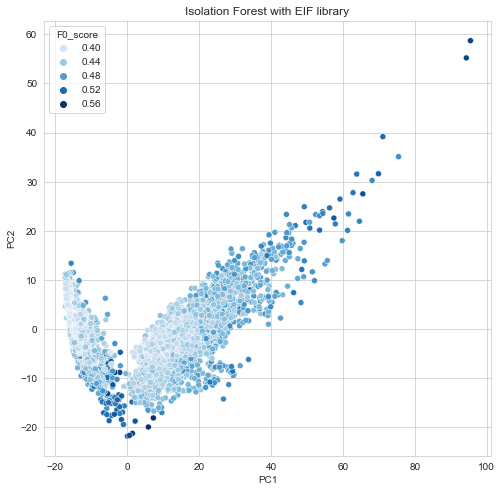

In [52]:
# 2D plot su PCA
x=X_pca[:,0]
y=X_pca[:,1]
train['F0_score'] = S0

#ss0=np.argsort(S0)X_train['F0_score']

plt.figure(figsize=(8,8))
sns.scatterplot(x=x,y=y, hue=train['F0_score'], palette='Blues')
#sns.scatterplot(x=x[ss0[-74:]],y=y[ss0[-74:]])
plt.title('Isolation Forest with EIF library')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

_Extended Isolation Forest_

In [53]:
F1 = iso.iForest(X, ntrees=200, sample_size=256, ExtensionLevel=150) # extented Isolation Forest

In [54]:
S1 = F1.compute_paths(X_in=X) # scores of extended isolation forest

In [55]:
X_train['F1_score'] = S1
X_train.sort_values(['F1_score'], ascending=False)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",...,fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",F0_score,F1_score
2451,-1.000000,0.177522,0.543939,-0.100786,0.448500,-0.179145,0.674782,-0.072124,0.719163,-0.212213,...,-0.889096,-1.000000,-0.245027,0.487262,-0.061649,0.129772,-0.296755,-0.087100,0.564451,0.581581
3935,0.418868,-0.000011,-0.103503,0.876942,0.066544,0.261963,0.278016,-0.154666,0.101406,0.258810,...,0.288564,-0.841270,0.289296,0.006299,-0.638834,-0.558603,0.965174,0.056948,0.549812,0.575767
3934,0.028502,-0.012144,-0.097018,0.793422,0.323269,0.232357,0.398452,-0.534296,-0.367215,0.404971,...,-0.494482,-0.841270,0.066248,-0.240357,0.893470,0.536252,0.812812,0.067803,0.549544,0.566102
2440,-0.872395,0.154608,0.330753,-0.060639,-0.205096,-0.040885,0.462166,-0.260699,-0.078709,0.459013,...,-0.925019,-1.000000,-0.777016,0.120689,-0.066795,0.223959,-0.329403,-0.076789,0.564391,0.565993
1523,-0.283794,-0.102911,0.059291,-0.496530,-0.819896,-0.226602,0.171241,0.485549,0.794306,-0.178315,...,-0.927184,-1.000000,0.330645,0.496357,-0.046000,0.023301,-0.494378,0.478109,0.556923,0.557155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,0.278787,-0.015617,-0.109123,-0.995002,-0.999728,-0.600966,-0.548369,0.320913,0.299307,0.010211,...,-0.989319,-0.936508,0.236370,-0.472787,-0.118186,0.050353,0.173157,0.158657,0.386885,0.400921
7218,0.278472,-0.011964,-0.109970,-0.995772,-0.999770,-0.650499,-0.616281,0.366505,0.124289,0.156570,...,-0.995979,-1.000000,0.160016,-0.263390,-0.011755,-0.162799,-0.495875,0.538898,0.390096,0.400882
2267,0.276056,-0.015893,-0.109977,-0.992142,-0.999660,-0.584878,-0.553252,0.069025,0.167736,0.209120,...,-0.993309,-0.936508,0.046117,-0.533685,0.190759,0.404503,-0.403910,0.132280,0.379892,0.400588
3250,0.271944,-0.021024,-0.115124,-0.996375,-0.999707,-0.786553,-0.699035,0.141831,0.142478,0.012814,...,-0.992943,-1.000000,0.428640,-0.609108,0.029883,-0.100440,-0.206314,-0.151965,0.387279,0.399520


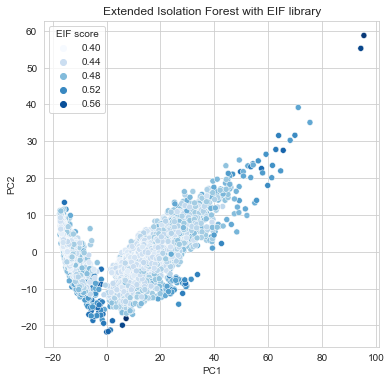

In [70]:
# 2D plot su PCA
x=X_pca[:,0]
y=X_pca[:,1]
train['EIF score'] = S1

#ss0=np.argsort(S0)X_train['F0_score']

plt.figure(figsize=(6,6))
sns.scatterplot(x=x,y=y, hue=train['EIF score'], palette='Blues')
#sns.scatterplot(x=x[ss0[-74:]],y=y[ss0[-74:]])
plt.title('Extended Isolation Forest with EIF library')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

## Intersection of approaches to determine outliers

In [60]:
# intersezione outliers ABOD e Isolation Forest 
idx_new = pd.merge(outlier_adob, outlier_isolationForest[outlier_isolationForest.columns.difference(outlier_adob.columns)], 
                   left_index=True, right_index=True)
idx_new.shape

(143, 153)

In [62]:
idx_new_f1sort = idx_new.sort_values(['F1_score'], ascending=False)
idx_new_f1sort

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-energy()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4",...,fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",F0_score,F1_score
2451,-1.000000,0.177522,0.543939,-0.100786,0.448500,-0.179145,0.674782,-0.072124,0.719163,-0.212213,...,-0.889096,-1.000000,-0.245027,0.487262,-0.061649,0.129772,-0.296755,-0.087100,0.564451,0.581581
3935,0.418868,-0.000011,-0.103503,0.876942,0.066544,0.261963,0.278016,-0.154666,0.101406,0.258810,...,0.288564,-0.841270,0.289296,0.006299,-0.638834,-0.558603,0.965174,0.056948,0.549812,0.575767
3934,0.028502,-0.012144,-0.097018,0.793422,0.323269,0.232357,0.398452,-0.534296,-0.367215,0.404971,...,-0.494482,-0.841270,0.066248,-0.240357,0.893470,0.536252,0.812812,0.067803,0.549544,0.566102
2440,-0.872395,0.154608,0.330753,-0.060639,-0.205096,-0.040885,0.462166,-0.260699,-0.078709,0.459013,...,-0.925019,-1.000000,-0.777016,0.120689,-0.066795,0.223959,-0.329403,-0.076789,0.564391,0.565993
1523,-0.283794,-0.102911,0.059291,-0.496530,-0.819896,-0.226602,0.171241,0.485549,0.794306,-0.178315,...,-0.927184,-1.000000,0.330645,0.496357,-0.046000,0.023301,-0.494378,0.478109,0.556923,0.557155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,0.307966,0.049374,-0.122728,0.139652,0.303303,0.405912,0.428279,-0.277091,0.193213,-0.031218,...,-0.997298,-0.904762,0.232783,-0.423242,0.020855,0.771298,0.886890,-0.160355,0.477959,0.473160
1870,0.288339,-0.028646,-0.087094,0.112097,-0.313058,0.359196,0.381822,-0.122601,0.113709,0.001861,...,-0.403267,-0.936508,0.322121,-0.498900,-0.042493,0.921890,-0.866670,-0.181238,0.487340,0.472558
5035,0.353262,-0.021753,-0.089856,0.124373,-0.257004,0.535008,0.400460,-0.057275,0.275453,-0.037816,...,-0.611067,-0.904762,0.223342,-0.391262,-0.633030,0.757036,-0.845360,-0.020320,0.481975,0.469424
2348,0.324810,-0.032645,-0.040332,-0.036388,-0.242454,0.356970,0.487061,-0.001229,0.390184,0.040802,...,-0.740268,-0.365079,0.147313,-0.627217,-0.066678,0.715487,0.498292,0.638071,0.478815,0.468498


In [63]:
top_outliers_F1 = idx_new_f1sort.iloc[:74]
top_outliers_F1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 2451 to 4945
Columns: 153 entries, tBodyAcc-mean()-X to F1_score
dtypes: float64(153)
memory usage: 89.0 KB


In [ ]:
X_train_SenzaOutliers = X_train.drop(top_outliers_F1.index)
X_train_SenzaOutliers.info()

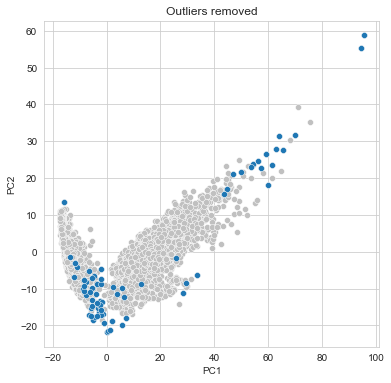

In [71]:
# 2D LOF plot su PCA
x=X_pca[:,0]
y=X_pca[:,1]

plt.figure(figsize=(6,6))

sns.scatterplot(x=x, y=y, color = 'silver')
sns.scatterplot(x=x[top_outliers_F1.index],y=y[top_outliers_F1.index], color = 'tab:blue')
plt.title('Outliers removed')
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

In [ ]:
X_train_SenzaOutliers.to_csv('X_TR_151_SENZA_OUTLIERS.zip',index = False)

In [ ]:
Y_train_SenzaOutliers = y_train.drop(top_outliers_F1.index)
Y_train_SenzaOutliers.to_csv('Y_TR_151_SENZA_OUTLIERS.zip',index = False)